## Plots of BERT emotions

In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt
import ndjson

In [2]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [23]:
filename = os.path.join("..","summarized_emo", "tweets_emo_date.ndjson")
with open(filename) as f:
    file_ = ndjson.load(f)

dates = [line["group"] for line in file_]
emos = [line["emo_prob"] for line in file_]
emos_sd = [line["emo_prob_sd"] for line in file_]

In [27]:
happy = []
trust = []
expect = []
surprise = []
anger = []
contempt = []
sad = []
fear = []

for lst in emos: 
    happy.append(lst[0])
    trust.append(lst[1])
    expect.append(lst[2])
    surprise.append(lst[3])
    anger.append(lst[4])
    contempt.append(lst[5])
    sad.append(lst[6])
    fear.append(lst[7])
    

In [9]:
dates = [pd.to_datetime(date) for date in dates]

In [7]:
event_dict = {"first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              # "christmas": dt.datetime(2020, 12, 24),
              # "new year": dt.datetime(2020, 12, 31),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
              "coronapas launced": dt.datetime(2021, 5, 27),
            #   "C. Eriksen": dt.datetime(2021,6,12),
              "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              "all restrictions lifted": dt.datetime(2021, 9, 10),
              "somalian funeral": dt.datetime(2020, 7, 31)}

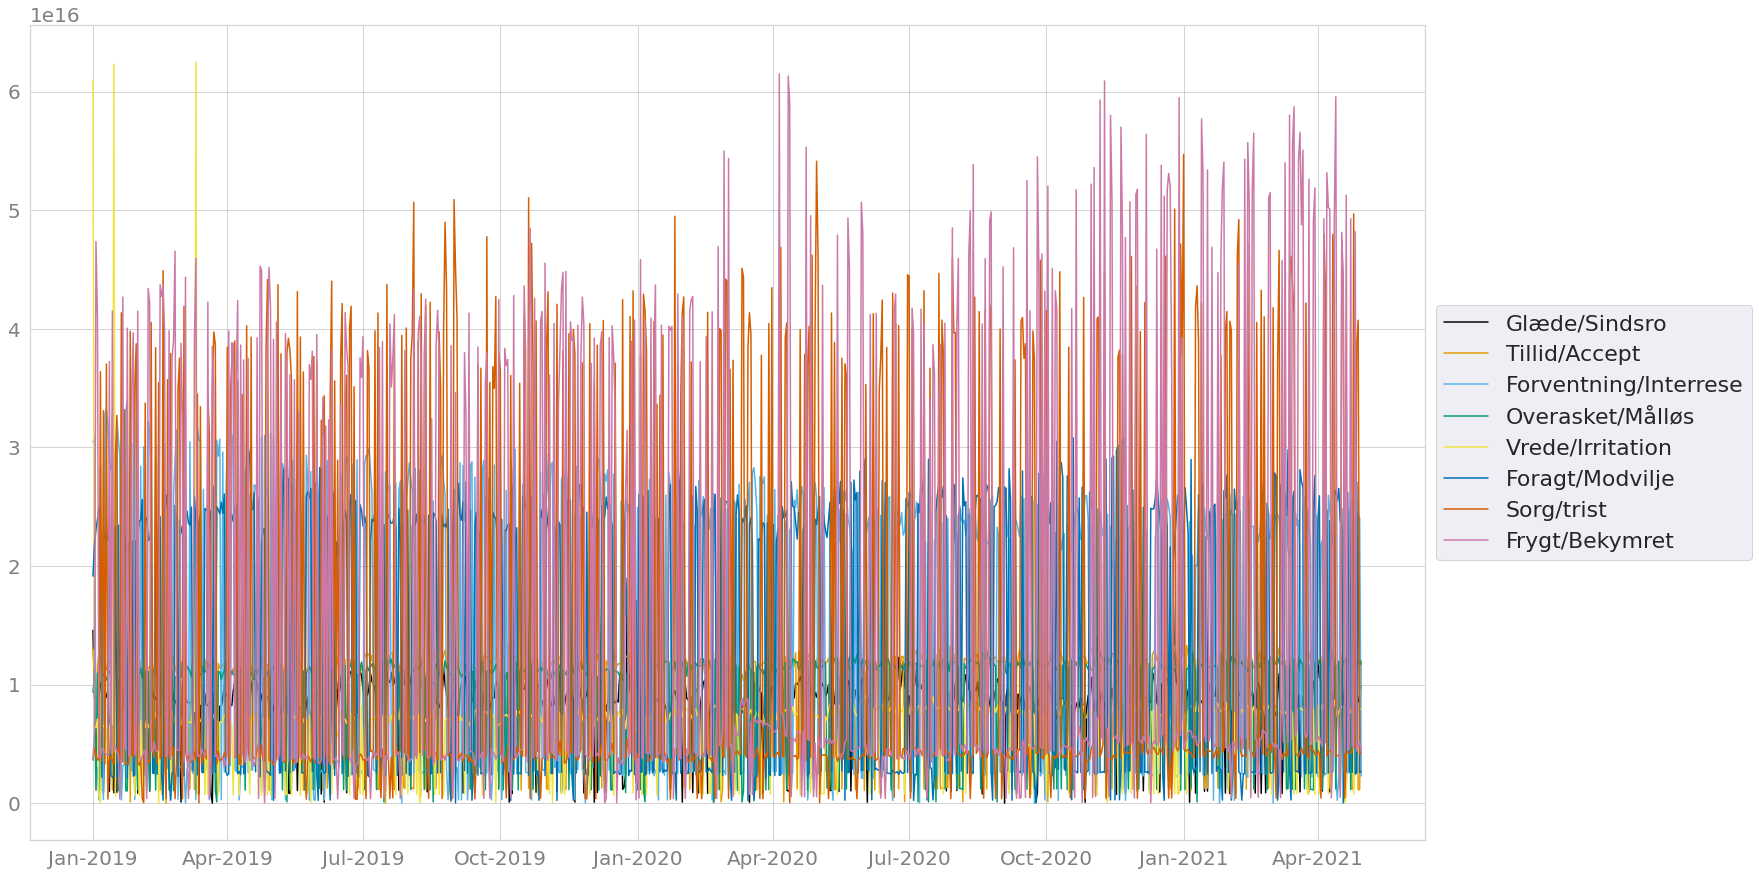

In [10]:
event_dict = None

fig, ax1, palette= set_base_plot_settings(20, True)
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

for i, emotion in enumerate([happy, trust, expect, surprise, anger, contempt, sad, fear]):
    plt.plot(dates, emotion, color = palette[i], label = labels[i])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if event_dict:
    for event, time in event_dict.items():
        plt.vlines(x = time, ymax=0.5, ymin=-0.05, colors='Red',
                label = event, linestyle = 'dashed')
        plt.text(x = time + dt.timedelta(days=1, hours = 12) , y = 0.35,
            s = event,
            fontdict = dict(color="black",size=15),
            #  bbox = dict(facecolor="white",alpha=0.5), 
            rotation=90)
    # plt.legend(labels)


fig, ax1 = set_late_plot_settings(if_dates = True)
# plt.savefig("fig/all_emo_events.png")

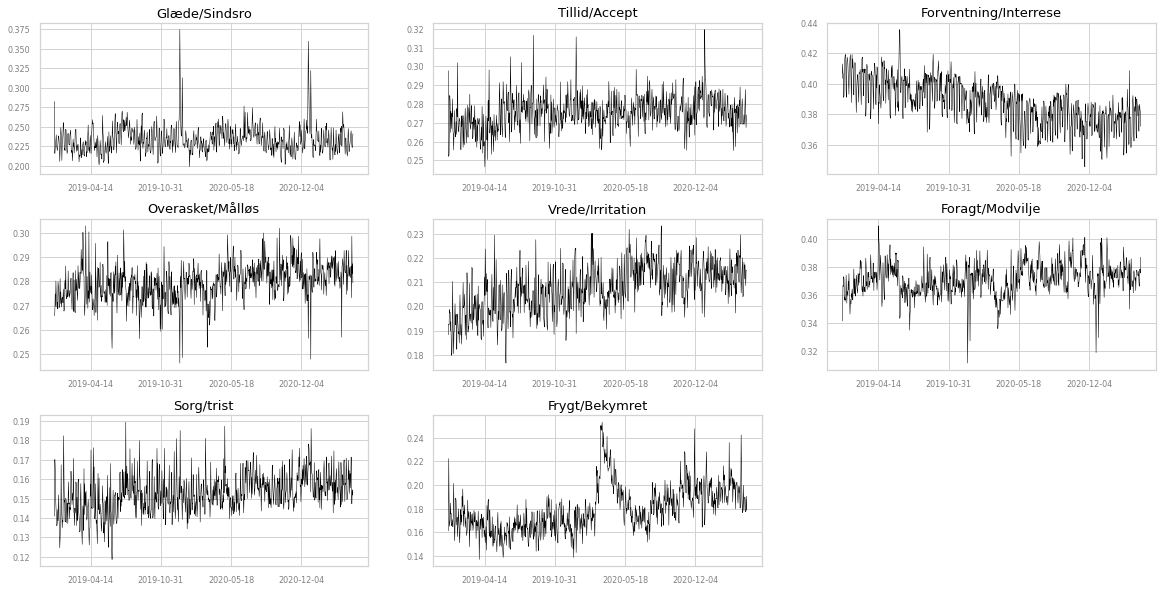

In [14]:
fig, axs = plt.subplots(3,3, figsize = (20,10))
labelsize = 8
matplotlib.rc('xtick', labelsize=labelsize) 
matplotlib.rc('ytick', labelsize=labelsize) 
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]
themes.theme_minimal(grid=True, ticks=False, fontsize=10)
k = 0
j = 0
for i, emotion in enumerate([happy, trust, expect, surprise, anger, contempt, sad, fear]):
    # ax1 = fig.add_subplot()
    axs[k, j].plot(dates, emotion, label = labels[i], linewidth = 0.5)
    axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(5))
    axs[k, j].set_title(labels[i], fontdict = {"fontsize": 13}, color = "Black")
    j += 1
    if j > 2:
        k += 1
        j = 0
    

# for event, time in event_dict.items():
#     plt.vlines(x = time, ymax=0.35, ymin=-0.05, colors='Red',
#                label = event, linestyle = 'dashed')
#     plt.text(x = time, y = 0.0,
#          s = event,
#          fontdict = dict(color="black",size=20),
#         #  bbox = dict(facecolor="white",alpha=0.5), 
#          rotation=90)
# plt.legend(labels)
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.delaxes(axs[2,2])
plt.subplots_adjust(hspace=0.3)
# fig, axs[k,j] = set_late_plot_settings(if_dates = True)

# plt.savefig("fig/all_emo_subplots.png")
plt.show()